## Chapter 10

### 인공 뉴런

* 초기 신경망 모델 : 하나 이상의 이진 입력과 이진 출력 하나를 가짐.
* 퍼셉트론 : 입력과 출력이 이진 값이 아닌 어떠한 숫자이고, 각 입력 연결이 가중치와 연관되어 있는 인공 뉴런(TLU, 또는 LTU)을 기반으로 한 인공 신경망 구조.
  * TLU는 입력의 가중치 합을 계산($z=w_1x_1+w_2x_2+...+w_nx_n=\mathbf{x}^T\mathbf{w}$)한 뒤 그 합에 계단 함수(step function)를 적용하여 결과를 출력함
  * $h_w(\mathbf{x})=step(z), z=\mathbf{x}^T\mathbf{w}$
  * 자주 사용되는 계단 함수는 heaviside 계단 함수 $\text{heaviside}(z)=\begin{cases}
0, & z<0일 때 \\
1, & z\geq0일 때
\end{cases}$ 또는 부호 함수도 사용$\text{sgn}(z)=\begin{cases}
-1, & z<0일 때 \\
0, & z=0일 때 \\
1, & z>0일 때
\end{cases}$
* 하나의 TLU로는 간단한 선형 분류 문제에 사용할 수 있음. 로지스틱 회귀나 SVM 분류기처럼 임의의 선형 조합을 계산해 그 결과가 임곗값을 넘으면 양성 클래스를 출력하고 그렇지 않으면 음성 클래스 출력.
* 퍼셉트론은 층이 하나뿐인 TLU로 구성. 각 TLU는 모든 입력에 연결되어 있음. 퍼셉트론의 입력을 입력 뉴런이라는 특별한 통과 뉴련에 주입.
  * 입력 뉴런 : 어떤 입력이 주입되든 출력으로 통과시키는 것.
  * 입력층은 모두 입력 뉴런으로 구성되고, 편향 특성($x_0=1$)이 더해짐. 이 편향 특성은 입력 없이 항상 1을 출력하는 특별한 종류의 뉴런인 편향 뉴런으로 표현됨. 즉, 출력 층의 입력으로 입력 층 뉴런과 편향 뉴런이 들어옴.
* 완전 연결 층(fully connected layer, 또는 밀집 층(dense layer)) : 한 층의 모든 뉴런이 이전 층의 모든 뉴련과 연결되어 있는 것.
* 출력의 수학적 표현 : $h_{\mathbf{W}, b}(\mathbf{X})=\phi(\mathbf{XW}+\mathbf{b})$
  * $\mathbf{X}$ : 입력 특성의 행렬. 행은 샘플, 열은 특성
  * $\mathbf{W}$ : 편향 뉴런을 제외한 모든 연결 가중치가 포함된 행렬. 행은 입려 뉴런, 열은 출력층에 있는 인공 뉴런
  * $\mathbf{b}$ : 편향 뉴런과 인공 뉴런 사이의 연결 가중치.
  * $\phi$ : 활성화 함수. 여기서는 계단 함수.
* 퍼셉트론은 생물학적 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 더 강해진다는 헤브의 규칙에 영향을 받아 학습함. 퍼셉트론의 학습 규칙은 오차가 감소되도록 연결이 강화됨.
  * 학습 규칙 : $w_{i,j}^{(next step)}=w_{i,j}+\eta(y_j-\hat{y}_j)x_i$
    * $w_{i,j}$ : i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
    * $x_i$ : 현재 훈련 샘플의 i번째 뉴런의 입력값
    * $\hat{y}_j$ : 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
    * $y_i$ : 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값
    * $\eta$ : 학습률
* 각 출력 뉴런의 결정 경계가 선형이므로 퍼셉트론은 복잡한 패턴을 학습하지 못하지만, 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 것이 증명되었고, 이를 퍼셉트론 수렴 이론이라고 함.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # 하나의 TLU 네트워크를 구현한 클래스.

iris = load_iris()
X = iris.data[:, (2,3)]     # 꽃잎의 길이와 너비
y = (iris.target==0).astype(np.int) # 꽃잎이 Iris Setosa인지 아닌지

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])    # 길이와 너비가 2, 0.5인 꽃잎은 Iris Setosa

d:\pythonenv\mlenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\pythonenv\mlenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\pythonenv\mlenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<ipython-input-1-2c506bbdd20d>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [2]:
y_pred

array([0])

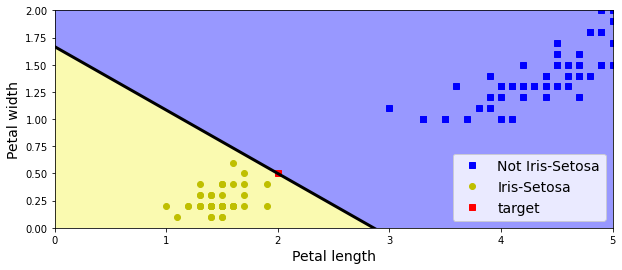

In [3]:
import matplotlib.pyplot as plt
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot(2, 0.5, "rs", label="target")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

* <code>Perceptron</code>클래스는 매개변수가 <code>loss="perceptron", learning_rate="constant", eta0=1, penalty=None</code>인 SGDClassifier(확률정 경사 하강법)과 같음.
* 클래스에 속할 확률은 제공하지 않으며, 고정된 입곗값을 기준으로 예측을 만들기 때문에 퍼셉트론보다는 로지스틱 회귀가 선호됨.

### 다층 퍼셉트론

* 단, 다른 선형 분류기와 바찬가지로 XOR 분류 문제와 같은 일부 간단한 문제는 풀 수 없음.
* 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있는데, 이러한 인공 신경망을 다층 퍼셉트론(MLP)아리고 함.
  * 다층 퍼셉트론은 XOR문제를 풀 수 있음.

* 입력층(통과, input layer) 하나, 하나 이상의 은닉층(hidden layer), 출력층(output layer)으로 구성됨.
  * 입력층과 가까운 층을 하위 층이라고 부르고, 출력층에 가까운 층을 상위 층이라고 부름
  * 모든 층은 편향 뉴런을 포함해 다음 층과 완전히 연결됨.
  * 신호는 입력에서 출력으로 한 방향으로만 흐르고, 이러한 구조를 피드포워드 신경망(feedforward neural network, FNN)이라고 함.
* 은닉층을 여러 개 쌓아 올린 인공 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 함. - 딥러닝

* 다층 퍼셉트론 훈련에는 역전파(backpropagation) 알고리즘을 사용함.
  * 효율적인 기법으로 gradient를 자동으로 계산하는 경사 하강법.
  * 네트워크를 정방향으로 한번, 역방향으로 한번 통과하는 것 만으로도 모든 모델 파라미터에 대한 네트워크 오차의 gradient를 계산할 수 있음. 즉, 오차를 감소시키기 위해 각 연결 가중치 값과 편향 값이 어떻게 바뀌어야 하는지 알 수 있음.
  * gradient를 구하면 평범한 경사 하강법을 수행하고 전체 과정은 네트워크가 어떠한 해결책으로 수렴할 때 까지 반복.
  * 자동으로 gradient를 계산하는 것을 자동 미분(automatic differentiation)이라고 하고, 이 중 역전파에서 사용하는 기법은 후진 모드 자동 미분(reverse-mode autodiff)을 사용. 미분할 함수가 연결 가중치와 같은 변수가 많고, 출력이 적은 경우 잘 맞음.
* 과정
  * 한 번에 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하고, 이러한 과정 하나하나를 에포크(epoch)라고 함.
    * 여러 epoch를 반복
  * 각 미니배치는 입력층으로 전달되어 첫 번째 은닉층으로 보내진 뒤, 해당 층에 있는 모든 뉴런의 출력을 계산함. 이 결과는 다음 층으로 전달됨.
  * 다음 층에서 다시 출력을 계산하고 그 결과는 그 다음 층으로 전달됨.
  * 이러한 과정을 출력층의 출력을 계산할 때 까지 계속됨. 이를 정방향 계산(forward pass)이라고 함.
  * 그 다음으로, 알고리즘이 손실 함수를 사용하여 기대하는 출력과(실제 값) 네트워크의 실제 출력(결과 값)을 비교하고 오차 측정 값을 반환함.
  * 각 출력 연결이 이 오차에 기여하는 정도를 계산. 연쇄 법칙(chain rule)을 적용하면 이 단계를 빠르고 정확하게 수행 가능.
  * 다시 연쇄 법칙을 적용하여 이전 층의 연결 가중치가 오차의 기여 정도에 얼마나 기여했는지 측정함. 이를 입력층에 도달할 때 까지 역방향으로 계속함.
  * 마지막으로 알고리즘은 경사 하강법을 수행하여 방금 계산한 오차 그레이디언트를 사용해 네트워크의 모든 연결 가중치를 수정함.
> 은닉층의 연결 가중치를 랜덤하게 초기화해야 훈련이 실패하지 않음.(ex. 모든 가중치와 편향을 0으로 초기화하면 층의 모든 뉴런이 완전히 같아지므로 역전파도 뉴런을 동일하게 바꾸어 모든 뉴런이 똑같아진 채로 남으므로 뉴런이 아무리 많아도 뉴런이 하나인 것 처럼 동작함.)
* 활성화 함수는 계단 함수 대신 로지스틱(sigmoid) 함수 $\sigma(z) = 1/(1+exp(-z))$로 바꿈.
  * 계단 함수는 수평선밖에 없으니 계산할 gradient가 없음.
  * 출력 범위는 0에서 1 사이
> 활송화 함수는 그 외에 tanh함수 ($\tanh(z) = 2\sigma(2z)-1$. S자 모양이며 연속적이고 미분 가능함. 출력 범위는 -1에서 1 사이. 훈련 초기에 각 층의 출력을 원점 근처로 모으는 영향이 있으므로 수렴이 빠르게 진행되도록 도와줌), ReLU 함수($\text{ReLU}(z) = \text{max}(0,z)$. 연속적이지만 z=0에서 미분 가능하지 않고, z<0인 경우 도함수는 0. 잘 작동하며 계산 속도가 빠르고, 출력에 최댓값이 없어서 경사 하강법의 일부 문제점을 해결함.)

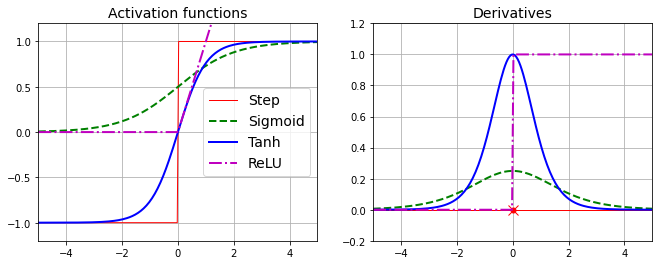

In [4]:
# from https://github.com/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

* 선형 변환을 여러 개 연결해봤자 또 다른 선형 변환이 되므로(ex. f(x)=2x+3과 g(x)=5x-1을 연결하면 f(g(x))=10x+1이 됨) 층 사이에 위와 같은 비선형성을 추가해야 복잡한 문제를 해결할 수 있음.
* 비선형 함수가 있는 충분히 큰 심층 신경망은 이론상 어떠한 연속 함수로도 근사할 수 있음.

* 다층 퍼셉트론은 회귀 작업에 사용 가능.
  * 값 하나를 예측하는 데 출력 뉴런이 하나만 필요함. 이 출력값이 예측된 값.
* 다변량 회귀(동시에 여러 값을 예측하는 것)는 출력 차원마다 출력 뉴런이 하나씩 필요
  * ex) 이미지에서 물체의 중심 위치를 파악하려면 2D좌표를 예측해야하므로 출력 뉴런 2개가 필요.
* 보통 회귀용 다층 퍼셉트론을 만들 때는 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 함. 단, 출력이 양수여야 한다면 출력층에 ReLU함수나 softplus(ReLU의 변종. $\text{softplus}(z)=\log(1+\exp(z))$. z가 음수일 때 0에 가까워지고 z가 큰 양수일수록 z에 가까움)함수를 사용. 어떠한 범위 안의 값을 예측하려면 sigmoid함수나 tanh함수를 사용하고 레이블의 스케일을 적절한 범위로 조정할 수 있음.
* 훈련 시 사용하는 손실 함수는 일반적으로 평균 제곱 오차를 사용.
  * 훈련 세트에 이상치가 많다면 평균 절댓값 오차를 사용할 수 있고, 또는 이 둘을 조합한 후버(Huber, 오차가 임곗값 $\sigma$(주로 1)보다 작을 때는 이차함수. 이보다 클 때는 선형 함수. 선형 함수 부분은 평균 제곱 오차보다 이상치에 덜 민감함.) 손실을 사용할 수 있음.
* 전형적인 회귀 MLP 구조    

|하이퍼파라미터     |일반적인 값|
|------------------|-----------|
|입력 뉴런 수       |특성마다 하나(ex. MNIST 데이터셋은 28*28크기 이미지이므로 784개의 뉴런)|
|은닉층 수          |문제에 따라 다름(보통 1~5)|
|은닉층 뉴런 수     |문제에 따라 다름(보통 10~100)|
|출력 뉴런 수       |예측 차원마다 하나|
|은닉층의 활성화 함수|ReLU(또는 SELU 등)|
|출력층의 활성화 함수|없음. 출력이 양수라면 ReLU, softplus. 출력을 특정 범위로 제한하면 sigmoid, tanh)|
|손실 함수          |MSE. 이상치가 있다면 MAE, Huber|

* 다층 퍼셉트론은 분류 작업에 사용 가능.
  * 이진 분류에서는 sigmoid 활성화 함수를 가진 하나의 출력 뉴런만을 필요로 하고, 출력은 0과 1사이의 실수값이 됨. 이를 양성 클래스에 대한 예측 확률로 해석가능.
  * 음성 클래스에 대한 예측 확률은 1-양성 클래스 예측 확률
* 다중 레이블 이진 분류 문제를 쉽게 처리 가능
  * ex) 이메일이 스팸 메일인지/아닌지, 긴급 메일인지/아닌지를 구별하기 위해 sigmoid 활성화 함수를 가진 두 출력 뉴런이 필요. 첫 번째 뉴런은 이메일이 스팸일 확률을 출력하고, 두 번째 뉴런은 이메일이 긴급한 메일일 화률을 출력. 출력된 확률의 하이 1이 될 필요는 없고 어떠한 레이블 조합도 출력할 수 있음.
* 각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할 수 있다면(ex. 0~9까지 숫자 이미지 분류) 클래스마다 하나의 출력 뉴런이 필요하고 이를 다중 분류라고 함. 출력층은 소프트맥스 함수.
> * 소프트맥스 함수는 샘플 $ \mathbf{x} $ 각각에 대한 점수에 지수 함수를 적용한 뒤 정규화함(모든 지수 함수의 결과의 합으로 나눔.). $$ \hat{p_k}=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k=\frac{\exp\left(s_k(\mathbf{x})\right)}{\sum_{j=1}^K\exp\left(s_j(\mathbf{x})\right)} $$
>   * $ K $ 는 클래스 수
>   * $ \mathbf{s}(\mathbf{x}) $ 는 샘플 $ \mathbf{x} $ 에 대한 각 클래스의 점수를 탐은 벡터
>   * $ \sigma\left(\mathbf{s}(\mathbf{x})\right)_k $ 는 샘플 $ \mathbf{x} $에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정 확률
> * 모든 예측 확률을 0과 1사이로 만들고 이들을 더했을 때 1이 되도록 만듦(클래스가 서로 배타적일 경우 필요)
* 손실 함수는 일반적으로 크로스 엔트로피 손실(cross-entropy loss, 또는 logloss)을 선택
* 전형적인 분류 MLP 구조

|하이퍼파라미터|이진 분류|다중 레이블 분류|다중 분류|
|-------------|--------|--------------|--------|
|입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일|
|출력 뉴런 수  |1개        |레이블 당 1개|클래스 당 1개|
|출력 층의 활성화 함수|sigmoid|sigmoid|softmax|
|손실 함수|cross-entropy|cross-entropy|cross-entropy|

> Tensorflow Playground(https://playground.tensorflow.org) : 텐서플로를 활용한 신경망 시뮬레이터
> * ReLU사용 시 선형 경계가 만들어짐
> * 은닉층이 줄어들면 훈련에 걸리는 시간에 차이가 나고 지역 최솟값에 갇히기도 함.
> * 뉴런 수가 작으면 좋은 솔류선을 찾을 수 없고 파라미터가 너무 적어 훈련 세트에 과소적합됨.
> * 신경망이 너무 크면 빠르게 훈련되고 지역 최솟값에 갇히지 않음.
>   * 대규모 신경망은 거의 절대로 지역 최솟값에 갇히지 않음.
> * 나선형 데이터셋+4개의 은닉층+각 은닉층 별 8개의 뉴런으로 학습하면 훈련 시간이 오래 걸리고 한번씩 긴 시간동안 평탄한 지역에 갇힘. 상위 층(오른쪽)에 있는 뉴런이 하위 층(왼쪽)에 있는 뉴런보다 도 빨리 학습되는 경향이 있고, 이를 그레이디언트 소실(vanishing gradient)라고 함. 이 문제는 더 좋은 가중치 초기화, 고급 optimizer(AdaGrad, Adam 등), 배치 정규화 등을 이용해 해결 가능.

### Keras

* 모든 종류의 신경망을 손쉽게 만들고 훈련, 평가, 실행할 수 있는 고수준 딥러닝 API.
* API 문서 : http://keras.io

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.5.0'

In [7]:
keras.__version__

'2.5.0'

In [8]:
# Fashion MNIST 데이터셋을 이용한 이미지 분류기
# 숫자 손글씨 MNIST 데이터셋과 형태는 동일(28*28 크기의 흑백 이미지 70000개 및 10개의 클래스로 이루어짐), 단 손글씨 숫자가 아닌 패션 아이템을 나타내는 이미지.
# 클래스마다 샘플이 다양해 MNIST보다 훨씬 어려운 문제.

# Fashion MNIST 데이터 적재
fashoin_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashoin_mnist.load_data()

In [9]:
# 784크기의 1D가 아닌 28*28크기의 2D
X_train_full.shape

(60000, 28, 28)

In [10]:
# 픽셀 강도는 정수형
X_train_full.dtype

dtype('uint8')

In [11]:
# 전체 train 데이터셋을 validation set과 train set으로 나눔.
# 경사 하강법을 사용해야 하므로 픽셀 강도를 255.0으로 나누어 0~1사이의 범위로 조정(자동으로 실수로 변환됨)
#   만일 새로운 데이터가 들어온다면 이에 대해서도 스케일 조정이 필요함.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [12]:
# 각 레이블에 해당하는 아이템을 나타내기 위해 클래스 이름의 리스트 생성
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]] # 훈련 세트의 첫 번째 이미지의 클래스 출력(코트)

'Coat'

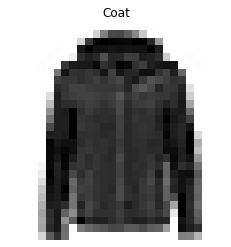

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis('off')
plt.show()

In [15]:
# 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

> * <code>2</code> : 가장 간단한 케라스의 신경망 모델인 <code>Sequential</code>모델을 생성. 순서대로 연결된 층을 일렬로 쌓아서 구성하고, 이를 Sequential API라고 부름.
> * <code>3</code> : 입력 이미지를 1D 배열로 반환하는 Flatten층을 첫 번째 층으로 추가. 입력 데이터 X를 받으면 X.reshape(-1, 28*28)을 계산.
>   * 모델 파라미터를 가지지 않고 간단한 전처리만 수행
>   * 첫 번째 층이므로 <code>input_shape</code>를 지정해야 함. 배치 크기를 제외하고 샘플의 크기만 써야 함.
>   * 또는 <code>input_shape=[28,28]</code>로 지정된 <code>keras.layers.InputLayer</code>층을 추가할 수도 있음.
> * <code>4, 5</code> : 각각 뉴런 300개, 100개를 가진 Dense 은닉층 추가. ReLU 활성화 함수 사용.
>   * Dense층마다 각자의 가중치 행렬을 관리하고, 이 행렬에는 해당 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함되고 뉴런마다 하나씩 있는 편향도 벡터로 관리함. 
>   * 이 층은 입력 데이터를 받으면 $h_{\mathbf{W}, b}(\mathbf{X})=\phi(\mathbf{XW}+\mathbf{b})$를 계산.
>   * <code>activation="relu"</code>대신 <code>activation=keras.activation.relu</code>사용 가능
> * <code>6</code> : 뉴런 10개를 가진 Dense 출력층 추가. 클래스끼리 배타적이므로 소프트맥스 활성화 함수 사용.

In [16]:
# 위 처럼 하나씩 층을 추가하지 않고 Sequential 모델을 만들 때 각 층의 list를 전달할 수도 있음
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [17]:
# 모델의 모든 층을 출력.
# 각 층의 이름(미 지정 시 자동으로 생성. name 매개변수에 이름 지정 가능), 출력 크기(None은 배치 크기에 어떤 값도 가능하다는 의미), 파라미터 개수를 출력하고, 마지막에는 훈련되는 파라미터와 훈련되지 않는 파라미터를 포함하여 전체 파라미터 개수를 출력
#   여기서는 훈련되는 파라미터만 존재.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


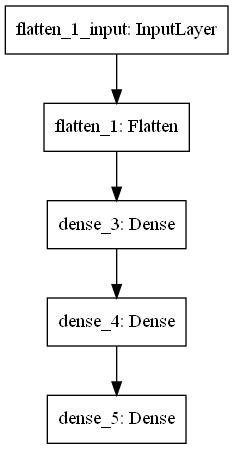

In [18]:
# keras 모델을 이미지로 출력
keras.utils.plot_model(model)

> * Dense층은 보통 많은 파라미터를 가짐
>   * ex) 첫 번째 은닉층은 784*300개의 연결 가중치와 300개의 편향을 가지므로 이들을 더하면 235,500개의 파라미터를 가짐. 이정도 크기의 모델은 훈련 데이터를 학습하기 충분한 유연성을 가지나, 과대적합의 위험 또한 가짐(특히 훈련 데이터가 많지 않을 때).

In [19]:
# 모델에 있는 층의 리스트 출력
model.layers

In [20]:
# 인덱스로 모델의 층 선택 가능
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
# 이름으로 모델의 층 선택
model.get_layer('dense_3') is hidden1

True

In [23]:
# 층의 모든 파라미터는 get_weights()와 set_weights()를 사용해 접근 가능. Dense 층의 경우 연결 가중치와 편향이 모두 포함되어있음.
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.01614544,  0.05566692,  0.04437967, ...,  0.03142239,
         0.04556945, -0.05108514],
       [ 0.06196909,  0.05812061,  0.0271401 , ..., -0.06250502,
        -0.03663392, -0.07173643],
       [ 0.04956774,  0.07044597,  0.00550505, ..., -0.05619322,
        -0.04352807,  0.02940596],
       ...,
       [ 0.03726996,  0.0463405 ,  0.02789127, ...,  0.06411278,
        -0.06960994, -0.06631172],
       [ 0.03490958,  0.01371035,  0.05450428, ..., -0.06954592,
        -0.00370638,  0.05869949],
       [ 0.0327867 ,  0.05411711,  0.03802098, ...,  0.02009976,
        -0.0649083 ,  0.00485561]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

> * Dense층은 연결 가중치를 무작위로 초기화하고, 편향은 0을 ㅗ초기화함.
> * 다른 초기화 방법을 사용하고 싶다면 <code>kernel_initializer</code> (kernel은 연결 가중치 행렬의 또 다른 이름)와 <code>bias_initializer</code> 매개변수를 설정 가능
>   * https://keras.io/initializers